#Run tflite inference on a example Dataset

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tflite_runtime.interpreter as tflite


ROWS_PER_FRAME = 543  # number of landmarks per frame

def load_relevant_data_subset(pq_path):
    data_columns = ['x', 'y', 'z']
    data = pd.read_parquet(pq_path, columns=data_columns)
    n_frames = int(len(data) / ROWS_PER_FRAME)
    data = data.values.reshape(n_frames, ROWS_PER_FRAME, len(data_columns))
    return data.astype(np.float32)


pip install tensorflow-addons

In [10]:
interpreter = tflite.Interpreter('/media/psf/Home/MLProjects/ASL/holistic/model.tflite')
found_signatures = list(interpreter.get_signature_list().keys())
prediction_fn = interpreter.get_signature_runner("serving_default")
print(found_signatures)

['serving_default']


In [11]:
train = pd.read_csv('/media/psf/Home/MLProjects/ASL/asl-signs/train.csv')
# Add ordinally Encoded Sign (assign number to each sign name)
train['sign_ord'] = train['sign'].astype('category').cat.codes

# Dictionaries to translate sign <-> ordinal encoded sign
SIGN2ORD = train[['sign', 'sign_ord']].set_index('sign').squeeze().to_dict()
ORD2SIGN = train[['sign_ord', 'sign']].set_index('sign_ord').squeeze().to_dict()

pq_file = '/media/psf/Home/MLProjects/ASL/asl-signs/train_landmark_files/16069/10042041.parquet'
xyz_np = load_relevant_data_subset(pq_file)
prediction = prediction_fn(inputs=xyz_np)
sign = prediction['outputs'].argmax()

In [12]:
train.query('sequence_id == 10042041')

,path,participant_id,sequence_id,sign,sign_ord
101,train_landmark_files/16069/10042041.parquet,16069,10042041,green,102


Prediction Output

In [13]:
sign

102

In [14]:
ORD2SIGN[sign]

'green'

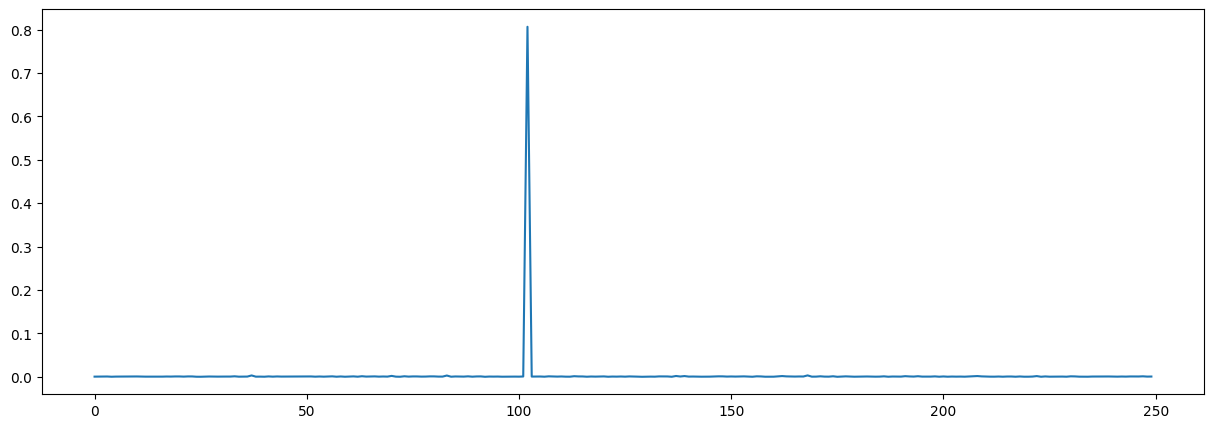

In [15]:
pd.Series(prediction['outputs']).plot(figsize=(15,5))
plt.show()

Show an Example Prediction for "nap"

In [16]:
train['sign'].value_counts().head(10)

listen     415
look       414
shhh       411
donkey     410
mouse      408
duck       405
hear       405
uncle      405
pretend    404
bird       404
Name: sign, dtype: int64